In [67]:
# import statements for various libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.applications import VGG16 as model 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [68]:
# Following Changes have been made to data set in order to use inbuilt functions of
# keras to read the data-set
# Step 1 : Create 2 folders Train and Test
# Step 2 : Move x_train to Train and x_test to Test
# Step 3 : Rename x_train as x and likewise for x_testb

In [82]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 150
conv_base = model(
    weights = 'imagenet',
    include_top = False,
    input_shape = (200,150,3)
)

def extractFeatures(directory, sample_count):  
  features = np.zeros(shape=(sample_count, 6, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory, target_size=(200, 150),
  batch_size=batch_size, class_mode='sparse')
  i=0
  for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= sample_count:
          break
  return features, labels


In [83]:
train_features, train_labels = extractFeatures('/content/drive/MyDrive/Colab Notebooks/Images/Train',150)
test_features, test_labels = extractFeatures('/content/drive/MyDrive/Colab Notebooks/Images/Test',100)

Found 150 images belonging to 5 classes.
5/5 [==============================] - 49s 10s/step
Found 100 images belonging to 5 classes.
4/4 [==============================] - 30s 7s/step


In [84]:
train_features = np.reshape(train_features, (150, 4*6* 512))
test_features = np.reshape(test_features, (100, 4*6*512))

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
predictedLabels = np.zeros(test_labels.shape)
predictedLabels = knn.predict(test_features)


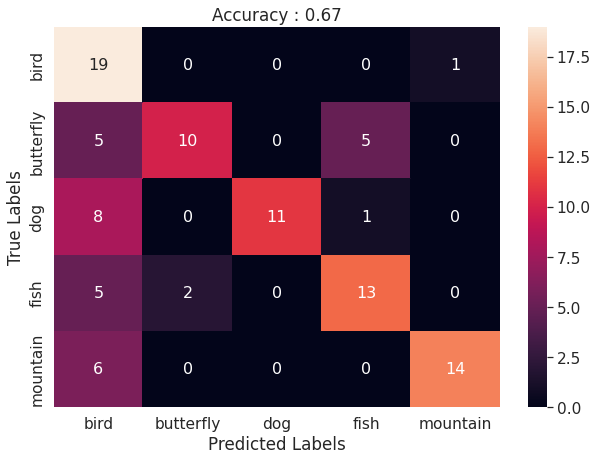

<Figure size 432x288 with 0 Axes>

In [86]:
cmat = confusion_matrix(test_labels, predictedLabels)
df_cm = pd.DataFrame(cmat, ['bird','butterfly','dog','fish','mountain'],['bird','butterfly','dog','fish','mountain'])
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Accuracy : ' + str(accuracy_score(predictedLabels, test_labels)))
plt.show()
plt.savefig('result.eps')